In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

%matplotlib inline

In [63]:
crime = pd.read_csv('crime.txt',header = -1)
crime.columns= ['Date','freq']
weather = pd.read_csv('weather_monthly.txt')
crime_lst = list(crime['freq'])[60:]
temp_lst= list(weather[' Temp'])[:-13]
spd_lst = list(weather[' Spd'])[:-13]




In [26]:
#date generate to graph
daterange = pd.date_range('2011-01','2016-12' , freq='1M') 
daterange = daterange.union([daterange[-1] + 1])  
daterange = [d.strftime('%y-%b') for d in daterange]


In [66]:
merged = pd.merge(crime,weather,how= 'inner',on=['Date'])
cols_dff=crime.shape[1]
                                            
comp_spearman = merged.corr(method="spearman").iloc[:cols_dff,cols_dff:]
comp_pearson = merged.corr(method="pearson").iloc[:cols_dff,cols_dff:]
print(comp_spearman)
print(comp_pearson)

           Spd      Visb      Temp      Prcp        SD       SDW
Date  0.008169  0.367258  0.074024 -0.091055 -0.000566  0.287901
freq -0.677703  0.377098  0.820085  0.010602 -0.621482 -0.496803
           Spd      Visb      Temp      Prcp        SD       SDW
Date  0.082578  0.311675  0.011409 -0.189137  0.060235  0.248818
freq -0.643294  0.308699  0.805650  0.071478 -0.508989 -0.444608


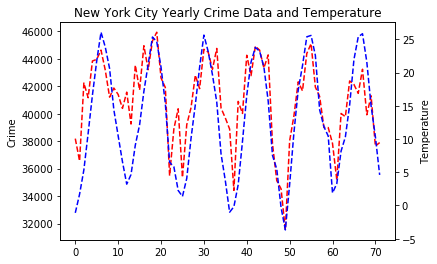

In [45]:
y1= crime_lst
y2 = temp_lst

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1,'r-',linestyle='--')
ax1.set_ylabel('Crime')
ax2 = ax1.twinx()
ax2.plot(y2,'b-',linestyle='--')
ax2.set_ylabel('Temperature')

plt.title("New York City Yearly Crime Data and Temperature")

In [44]:
print(spearmanr(crime_lst,temp_lst))
print(np.corrcoef(crime_lst, temp_lst))

SpearmanrResult(correlation=0.82008489291915887, pvalue=1.2349960778405615e-18)
[[ 1.          0.80565022]
 [ 0.80565022  1.        ]]


           Spd      Visb      Temp      Prcp        SD       SDW
Date  0.008169  0.367258  0.074024 -0.091055 -0.000566  0.287901
freq -0.677703  0.377098  0.820085  0.010602 -0.621482 -0.496803
           Spd      Visb      Temp      Prcp        SD       SDW
Date  0.082578  0.311675  0.011409 -0.189137  0.060235  0.248818
freq -0.643294  0.308699  0.805650  0.071478 -0.508989 -0.444608


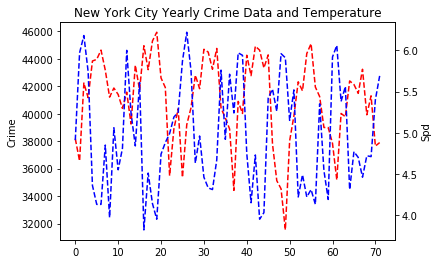

In [65]:
y1= crime_lst
y2 = spd_lst

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(y1,'r-',linestyle='--')
ax1.set_ylabel('Crime')
ax2 = ax1.twinx()
ax2.plot(y2,'b-',linestyle='--')
ax2.set_ylabel('Spd')

plt.title("New York City Yearly Crime Data and Temperature")

In [68]:
merged.to_csv('out.csv')